DEBUG:root:Initialized P-grid using projection +proj=stere  +lon_0=-45 +lat_0=90 +lat_ts=80 +ellps=sphere
DEBUG:root:Lower left corner lon/lat of grid: (-89.5,45.5)
DEBUG:root:Grid spacing in projection coords: (5.5e+03,5.5e+03)
DEBUG:root:Number of grid Nodes in x/y      : ( 1350, 1150)
DEBUG:root:Min   x projection coordinate = -3.63e+06
DEBUG:root:Max   x projection coordinate = 3.8e+06
DEBUG:root:Min   y projection coordinate = -3.7e+06
DEBUG:root:Max   y projection coordinate = 2.64e+06
DEBUG:root:Min lon = -180
DEBUG:root:Max lon = 180
DEBUG:root:Min lat = 44.5
DEBUG:root:Max lat = 90


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(11, 11) (10, 10)


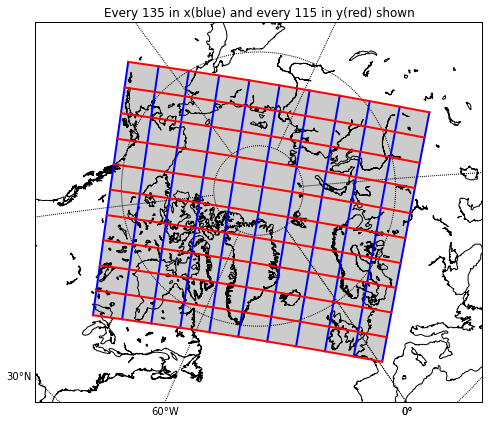

DEBUG:root:Endianness set to big


In [86]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import modeltools.grid
import matplotlib.pyplot
import modeltools.bathy
import modeltools.hycom.io
import numpy
grid1=modeltools.grid.Proj4Grid("+proj=stere  +lon_0=-45 +lat_0=90 +lat_ts=80 +ellps=sphere",
                              -89.5,45.5,5500,5500,1350,1150)
figure=grid1.plotgrid(1.5)
matplotlib.pyplot.show()


modeltools.hycom.io.write_regional_grid(grid1)



DEBUG:root:Filtering width half-width = 3 grid cells


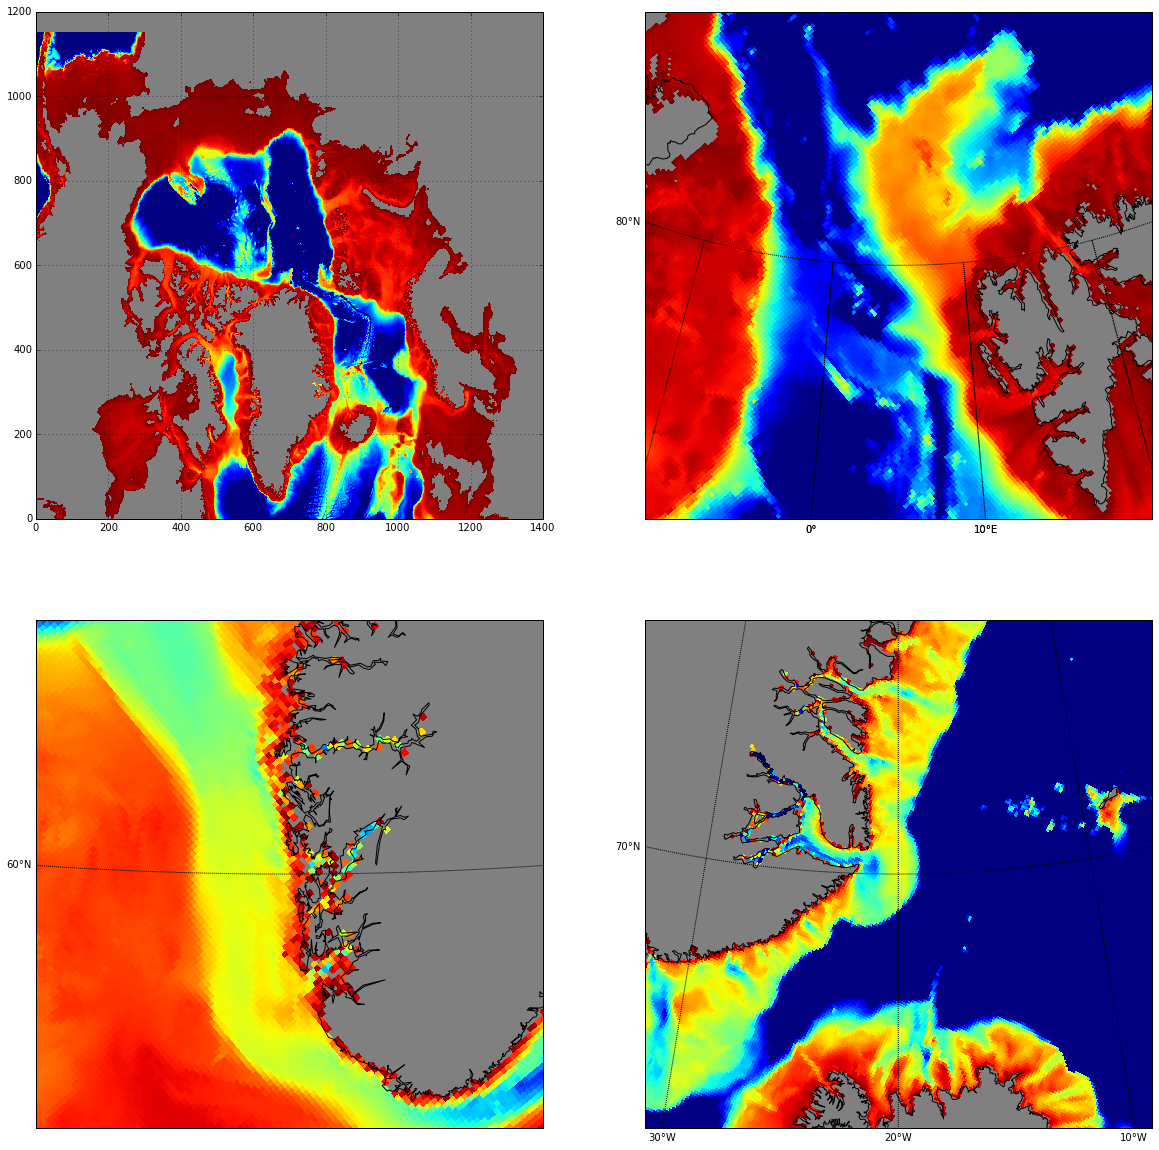

In [87]:
from mpl_toolkits.basemap import Basemap
gebco = modeltools.bathy.GEBCO2014("/Users/knutal/Bathymetry/GEBCO/GEBCO_2014_2D.nc")
lon,lat=grid1.pgrid()

w2=gebco.regrid(lon,lat,width=grid1.dx)
w2=numpy.ma.masked_where(w2>=modeltools.bathy.default_threshold,w2)





def plot_map(ax,m,lon,lat,w2) :
    x,y=m(lon,lat)
    P=m.pcolormesh(x,y,w2,ax=ax)
    ax = P.get_axes()
    ax.set_axis_bgcolor('.5')
    m.drawcoastlines()
    m.drawmapboundary() # draw a line around the map region
    m.drawparallels(numpy.arange(-90.,120.,10.),labels=[1,0,0,0],ax=ax) # draw parallels
    m.drawmeridians(numpy.arange(0.,420.,10.),labels=[0,0,0,1],ax=ax) # draw meridians
    ax.grid()
    return P

def plot_excerpt(lon,lat,w2) :

    figure = matplotlib.pyplot.figure(figsize=(20,20))
    ax=figure.add_subplot(221)
    P=matplotlib.pyplot.pcolormesh(w2)
    P.set_clim(-3000,0)
    ax = P.get_axes()
    ax.set_axis_bgcolor('.5')
    ax.grid()

    ax=figure.add_subplot(222)
    m = Basemap(width=750000,height=750000,
                resolution='i',projection='stere',\
                lat_ts=80,lat_0=80,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-3000,0)



    ax=figure.add_subplot(223)
    m = Basemap(width=500000,height=500000,
                resolution='i',projection='stere',\
                lat_ts=60,lat_0=60,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)
    
    ax=figure.add_subplot(224)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=70,lat_0=70,lon_0=-20)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)

    matplotlib.pyplot.show()
    
plot_excerpt(lon,lat,w2)


PAss 1
Found 2737 one neighbour cells
Found 648 one neighbour cells
Found 266 one neighbour cells
Found 126 one neighbour cells
Found 65 one neighbour cells
Found 34 one neighbour cells
Found 22 one neighbour cells
Found 12 one neighbour cells
Found 9 one neighbour cells
Found 4 one neighbour cells
Found 1 one neighbour cells
Found 1 one neighbour cells
Found 0 one neighbour cells
Main feature in terms of cells is feature 10
Position (  0.000, 60.000) : Feature 10 is used
Position ( 36.000, 75.000) : Feature 10 is used
Found 1216 islets
Found 170 islets
Found 26 islets
Found 12 islets
Found 6 islets
Found 5 islets
Found 2 islets
Found 2 islets
Found 2 islets
Found 1 islets
Found 1 islets
Found 1 islets
Found 0 islets
PAss 2
Found 0 one neighbour cells
Main feature in terms of cells is feature 1
Position (  0.000, 60.000) : Feature 1 is used
Position ( 36.000, 75.000) : Feature 1 is used
Found 0 islets


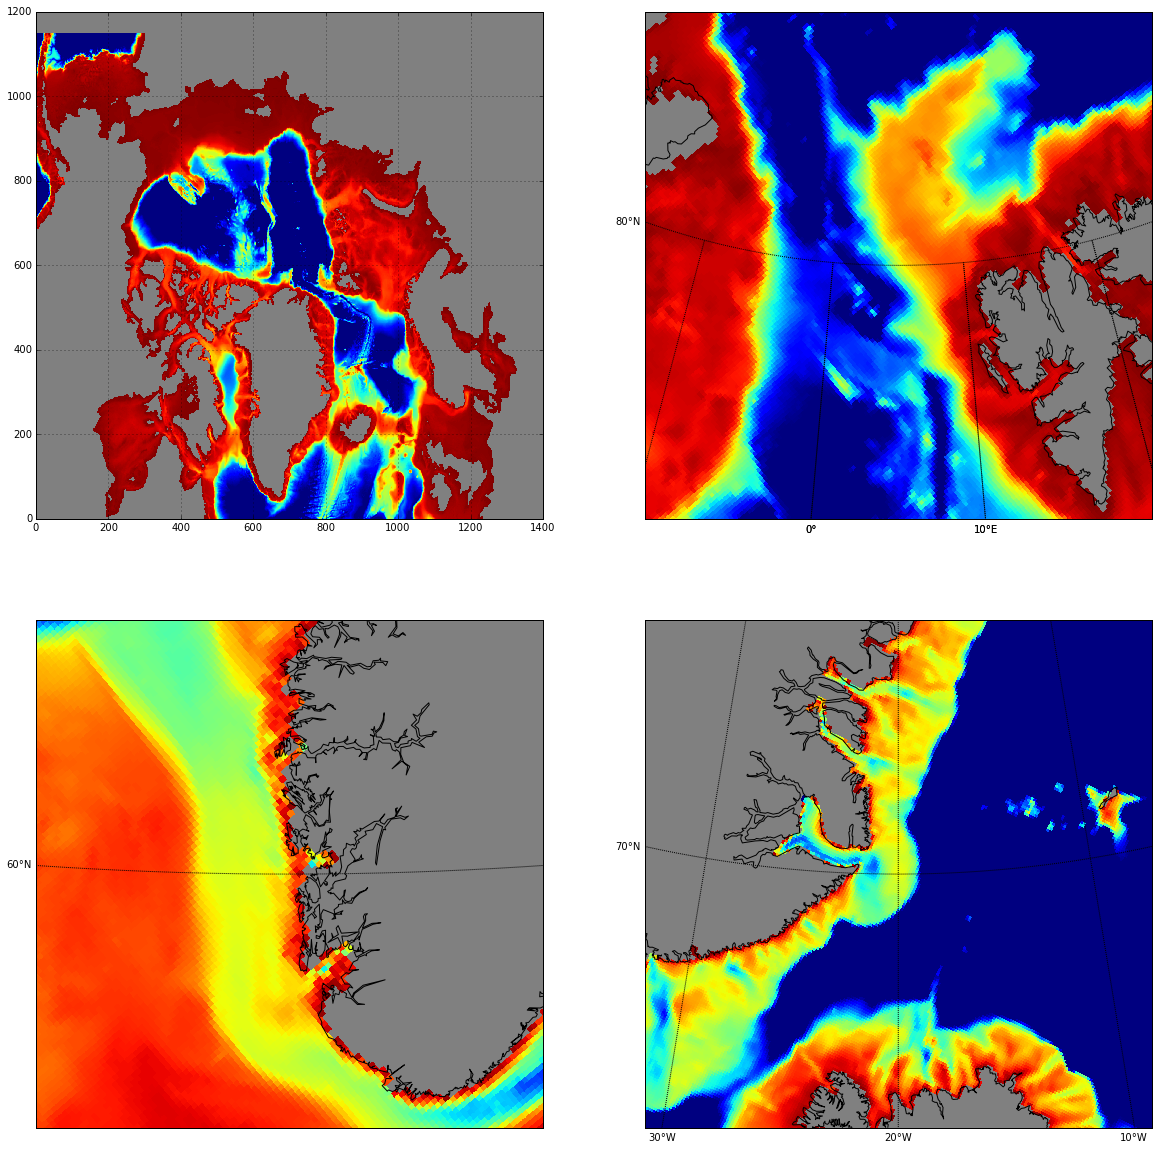

In [88]:
w3=numpy.copy(w2)
w3=modeltools.bathy.shapiro_filter(w3)

print "PAss 1"
w3=modeltools.bathy.remove_one_neighbour_cells(w3)
w3=modeltools.bathy.remove_isolated_basins(lon,lat,w3,[0,36],[60,75])
w3=modeltools.bathy.remove_islets(w3)

print "PAss 2"
w3=modeltools.bathy.remove_one_neighbour_cells(w3)
w3=modeltools.bathy.remove_isolated_basins(lon,lat,w3,[0,36],[60,75])
w3=modeltools.bathy.remove_islets(w3)

w3=numpy.ma.masked_where(w3>=modeltools.bathy.default_threshold,w3)

plot_excerpt(lon,lat,w3)

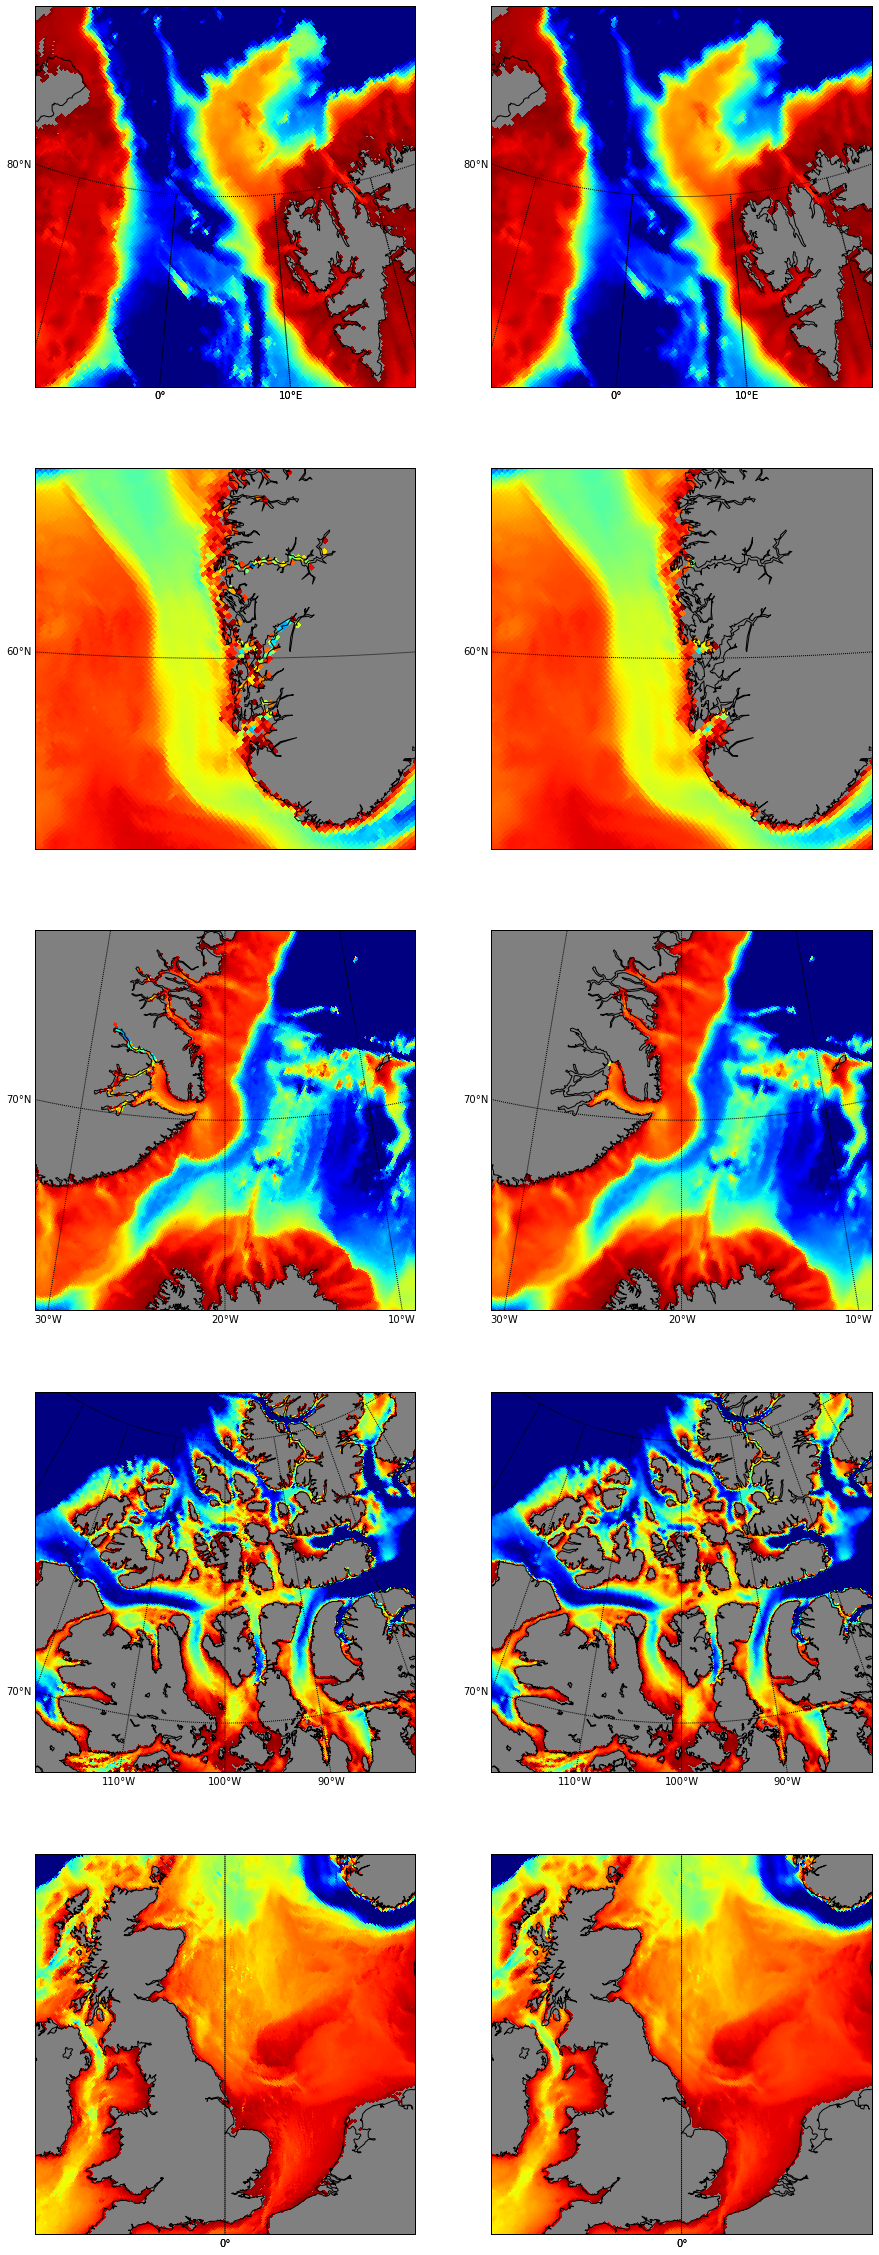

In [89]:
def plot_sidebyside(lon,lat,w2,w3) :

    figure = matplotlib.pyplot.figure(figsize=(15,40))

    ax=figure.add_subplot(521)
    m = Basemap(width=750000,height=750000,
                resolution='i',projection='stere',\
                lat_ts=80,lat_0=80,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-3000,0)
    
    ax=figure.add_subplot(522)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-3000,0)


    ax=figure.add_subplot(523)
    m = Basemap(width=500000,height=500000,
                resolution='i',projection='stere',\
                lat_ts=60,lat_0=60,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)
    
    ax=figure.add_subplot(524)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-750,0)

    
    ax=figure.add_subplot(525)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=70,lat_0=70,lon_0=-20)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-2000,0)
    
    ax=figure.add_subplot(526)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-2000,0)
    
    
    ax=figure.add_subplot(527)
    m = Basemap(width=1500000,height=1500000,
                resolution='i',projection='stere',\
                lat_ts=75,lat_0=75,lon_0=-100)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-500,0)
    
    ax=figure.add_subplot(528)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-500,0)
    
    ax=figure.add_subplot(529)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=55,lat_0=55,lon_0=0)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-300,0)
    
    ax=figure.add_subplot(5,2,10)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-300,0)

    matplotlib.pyplot.show()
    
    
plot_sidebyside(lon,lat,w2,w3)

In [92]:
modeltools.hycom.io.write_bathymetry("TP5a0.05",1,-w3,-modeltools.bathy.default_threshold)


DEBUG:root:Endianness set to big


in write_bathymetry 828651 1552500


DEBUG:root:Endianness set to big


5.5 7224.3125


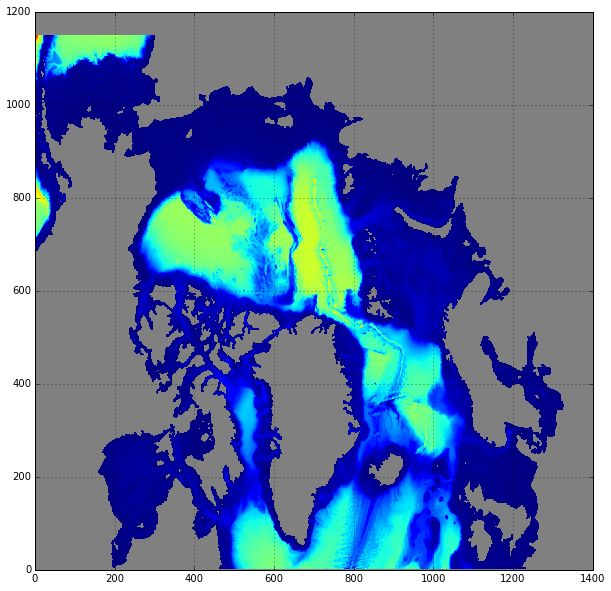

In [93]:
tmp=modeltools.hycom.io.ABFileBathy("depth_TP5a0.05_01","r",w3.shape[1],w3.shape[0])
w4=tmp.readfield("depth")
w4=numpy.ma.masked_where(w4> modeltools.hycom.io.AFile._huge*.5,w4)
tmp.close()
figure = matplotlib.pyplot.figure(figsize=(10,10))
ax=figure.add_subplot(111)
P=matplotlib.pyplot.pcolormesh(w4)
#P.set_clim(0,3000)
ax = P.get_axes()
ax.set_axis_bgcolor('.5')
ax.grid()
